## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [401]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [402]:
!ls Data

bom.movie_gross.csv
im.db
rt.movie_info.tsv
rt.reviews.tsv
tmdb.movies.csv
tn.movie_budgets.csv


In [403]:
bom_mov = pd.read_csv("data/bom.movie_gross.csv")

In [404]:
rt = pd.read_csv("data/rt.movie_info.tsv", sep='\t')

In [405]:
rt_rev = pd.read_table("data/rt.reviews.tsv", encoding= 'latin1')
rt_rev

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [406]:
review_rating = pd.merge(rt_rev, rt, how = 'inner', on = 'id').copy()

In [407]:
tmdb = pd.read_csv("data/tmdb.movies.csv")

In [408]:
fm = pd.merge(tmdb, bom_mov, how = 'inner', on = 'title').copy()

fm['domestic_gross'].dropna(axis = 'index', how = 'any')
fm.dropna(subset = ['domestic_gross'], inplace=True)

fm['foreign_gross'].fillna(0, inplace=True)
fm['foreign_gross'] = pd.to_numeric(fm['foreign_gross'], errors='coerce')

In [409]:
fm['worldwide_gross'] = fm['domestic_gross'] + fm['foreign_gross']

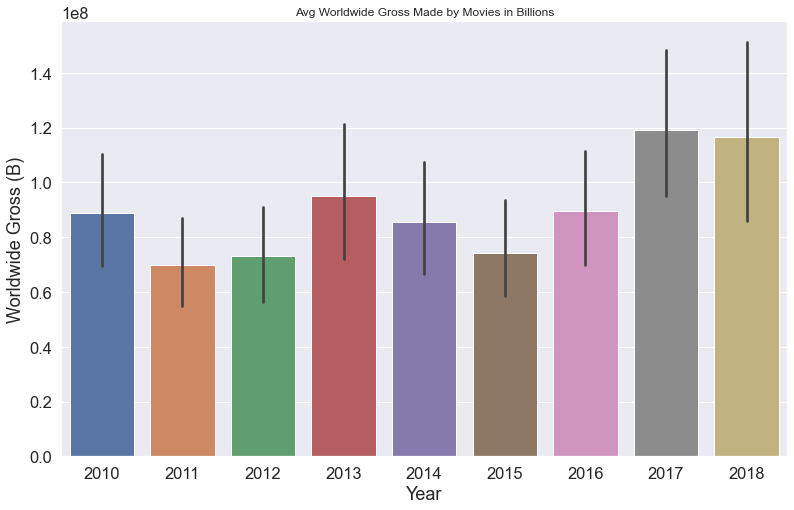

In [410]:
fig, ax = plt.subplots(figsize=(13,8))
sns.barplot(x = fm['year'], y = fm['worldwide_gross'], ax=ax);
sns.set(font_scale=1)

ax.set_xlabel("Year")
ax.set_ylabel("Worldwide Gross (B)")
ax.set_title("Avg Worldwide Gross Made by Movies in Billions")
plt.show()

In [419]:
tn = pd.read_csv("data/tn.movie_budgets.csv")
tn_copy = tn.copy()

In [420]:
tn['release_date'] = pd.to_datetime(tn['release_date']).dt.year  # Getting the YEAR from release_date
tn['release_date'] = pd.to_numeric(tn['release_date'])           # Converting to numeric
tn = tn[tn['release_date'] > 1999]                               # Years above 1999

# Cleaning worldwide gross column 
                                                                 # Replacing symbols then to_numeric
tn['worldwide_gross'] = pd.to_numeric(tn['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['worldwide_gross'] = tn['worldwide_gross'] * 1                # All numbers to positive
tn = tn[(tn['worldwide_gross'] > 100000000) & (tn['worldwide_gross'] < 2000000000)]
                                                                # All worldwide_gross greater than 30000000

# Cleaning production budget column 
                                                                 # Replacing symbols then to_numeric
tn['production_budget'] = pd.to_numeric(tn['production_budget'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['production_budget'] = tn['production_budget'] * 1            # All numbers to positive
tn = tn[tn['production_budget'] > 0]                             # All production_budget greater than 0

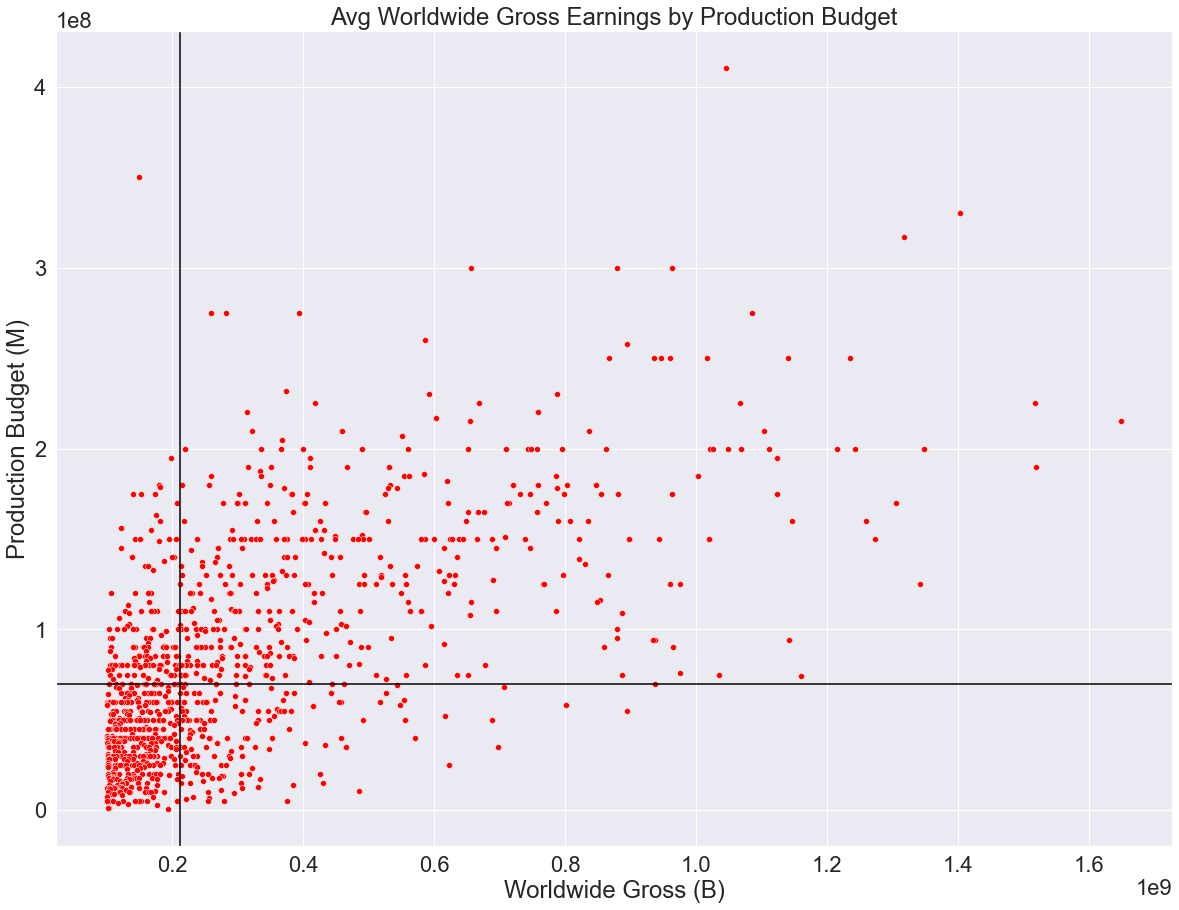

In [421]:
# production_budget / worldwide_gross correlation plot
pg_median = tn['production_budget'].median()
wwg_median = tn['worldwide_gross'].median()

fig, ax = plt.subplots(figsize=(20,15))
sns.scatterplot(x = tn['worldwide_gross'], y = tn['production_budget'], ax=ax, color="red");
sns.set(font_scale=2)

ax.set_xlabel("Worldwide Gross (B)")
ax.set_ylabel("Production Budget (M)")
ax.set_title("Avg Worldwide Gross Earnings by Production Budget")
ax.axhline(pg_median, color="black")
ax.axvline(wwg_median, color="black")

plt.show()

In [422]:
tn_copy['release_date'] = pd.to_datetime(tn_copy['release_date'])
tn_copy['month'] = tn_copy['release_date'].dt.month
tn_copy['worldwide_gross'] = tn_copy['worldwide_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
monthly_gross = tn_copy.groupby('month')['worldwide_gross'].sum()

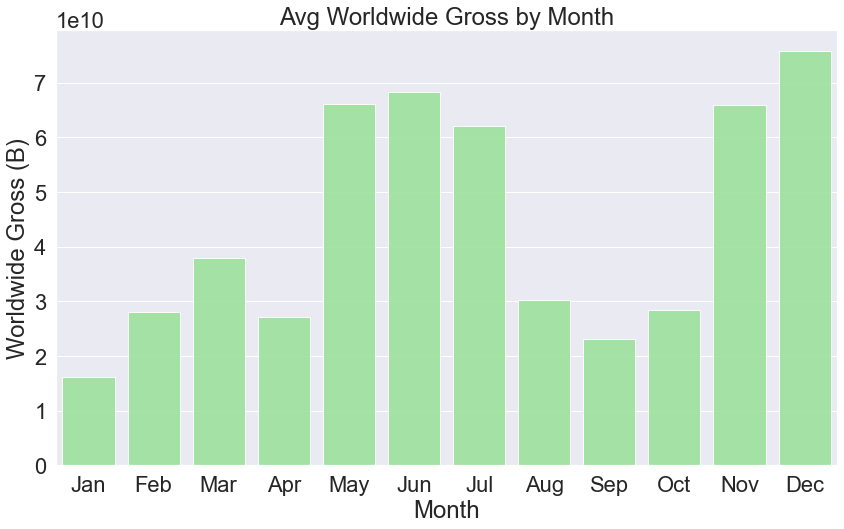

In [426]:
import calendar

x = [calendar.month_abbr[i] for i in monthly_gross.index]
y = monthly_gross.values

fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(x, y, color="lightgreen", alpha= 0.9)
ax.set_xlabel("Month")
ax.set_ylabel("Worldwide Gross (B)")
ax.set_title("Avg Worldwide Gross by Month")
plt.show()

In [424]:
conn = sqlite3.connect("Data/im.db")
imdb = pd.read_sql("""
SELECT *
  FROM sqlite_master 
 WHERE type = 'table';
""", conn)

In [338]:
imdb_principals = pd.read_sql("SELECT * FROM principals", conn)
imdb_persons = pd.read_sql("SELECT * FROM persons", conn)
imdb_movie_akas = pd.read_sql("SELECT * FROM movie_akas", conn)
imdb_movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
imdb_movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

In [339]:
merged_imdb_people = pd.merge(imdb_principals, imdb_persons, how="inner", on='person_id')

In [340]:
akas_ratings_imdb = pd.merge(imdb_movie_akas, imdb_movie_ratings, how="inner", on='movie_id')
merged_imdb = pd.merge(akas_ratings_imdb, imdb_movie_basics, how="inner", on='movie_id')

In [341]:
genres = merged_imdb["genres"].str.split(",").explode().unique()
genres

array(['Action', 'Adventure', 'Sci-Fi', 'Drama', 'Documentary', 'Romance',
       'Family', 'Fantasy', 'Crime', 'Thriller', 'Comedy', 'Mystery',
       'Musical', 'Animation', 'Horror', 'Sport', 'Music', 'History',
       'Biography', None, 'War', 'News', 'Western', 'Reality-TV',
       'Game-Show', 'Adult'], dtype=object)

In [342]:
rating_genre = merged_imdb[merged_imdb['genres'].isin(genres)].groupby("genres")["averagerating"].mean().sort_values()

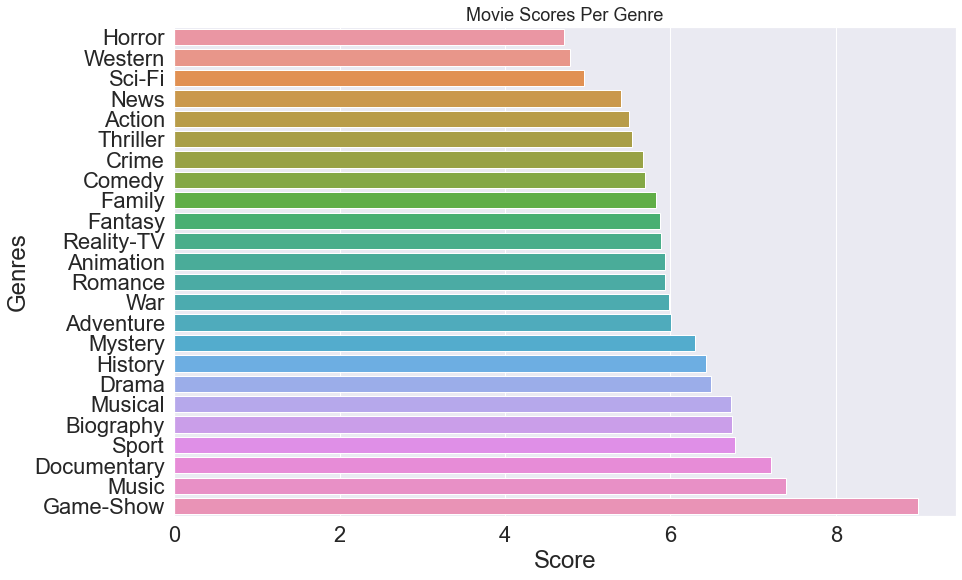

In [343]:
x = rating_genre.values
y = rating_genre.index

fig, ax = plt.subplots(figsize=(14,9))
sns.set(font_scale=1.5)
sns.set_palette("rocket")
sns.barplot(x,y)

ax.set_xlabel("Score")
ax.set_ylabel("Genres")

ax.set_title("Movie Scores Per Genre") 
# ax.tick_params(axis='x', rotation=75)
plt.show()

In [383]:
score_runtime = merged_imdb[merged_imdb['genres'].isin(genres)].groupby("genres")["averagerating", "runtime_minutes"].mean().sort_values(by=['averagerating', 'runtime_minutes'])
score_runtime.dropna(inplace=True)
score_runtime["runtime_minutes"] = score_runtime["runtime_minutes"].round(1)
score_runtime["averagerating"] = score_runtime["averagerating"].round(6)
score_runtime.index

Index(['Horror', 'Western', 'Sci-Fi', 'News', 'Action', 'Thriller', 'Crime',
       'Comedy', 'Family', 'Fantasy', 'Reality-TV', 'Animation', 'Romance',
       'War', 'Adventure', 'Mystery', 'History', 'Drama', 'Musical',
       'Biography', 'Sport', 'Documentary', 'Music', 'Game-Show'],
      dtype='object', name='genres')

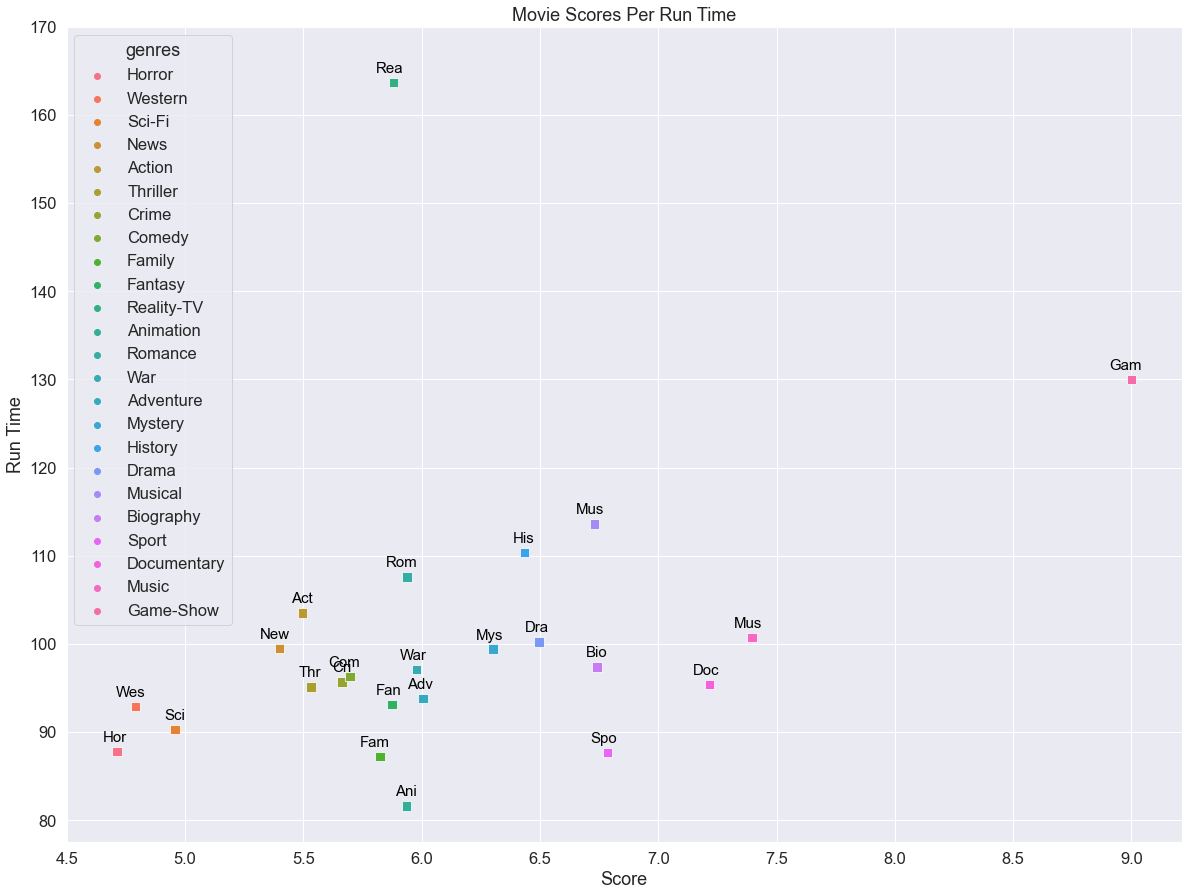

In [397]:
# x1 = score_runtime["averagerating"]
# y2 = score_runtime["runtime_minutes"]

# fig, ax = plt.subplots(figsize=(20,15))
# sns.set(font_scale=1.5)
# sns.scatterplot(x=x1, y=y2, hue=score_runtime.index,  marker='s', color='red', s=90)

# ax.set_xlabel("Score")
# ax.set_ylabel("Run Time")
# ax.set_title("Movie Scores Per Run Time")
# ax.set_xticks(np.arange(4.5, 9.5, 0.5))
# ax.set_yticks(np.arange(80, 180, 10))
# plt.show()

x1 = score_runtime["averagerating"]
y2 = score_runtime["runtime_minutes"]

fig, ax = plt.subplots(figsize=(20,15))
sns.set(font_scale=1.5)
sns.scatterplot(x=x1, y=y2, hue=score_runtime.index,  marker='s', color='red', s=90)

ax.set_xlabel("Score")
ax.set_ylabel("Run Time")
ax.set_title("Movie Scores Per Run Time")
ax.set_xticks(np.arange(4.5, 9.5, 0.5))
ax.set_yticks(np.arange(80, 180, 10))

for genre in score_runtime.index:
    genre_abbr = genre[:3]
    x = score_runtime.loc[genre, "averagerating"]
    y = score_runtime.loc[genre, "runtime_minutes"]
    ax.annotate(genre_abbr, xy=(x, y), xytext=(10, 10), textcoords='offset points', ha='right', fontsize=15, color='black')

plt.show()